In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

# EVT fits using tensorflow for autodiff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

In [4]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [5]:
w = tf.Variable(tf.random.normal((3, 2)), name="w")
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name="b")
x = [[1.0, 2.0, 3.0]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)

In [6]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [9]:
dl_dw, dl_db


(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.09011936, 10.3813715 ],
        [-0.18023872, 20.762743  ],
        [-0.2703581 , 31.144115  ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.09011936, 10.3813715 ], dtype=float32)>)

In [8]:
my_vars = {"w": w, "b": b}

grad = tape.gradient(loss, my_vars)
grad["b"]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.09011936, 10.3813715 ], dtype=float32)>

In [10]:
layer = tf.keras.layers.Dense(2, activation="relu")
x = tf.constant([[1.0, 2.0, 3.0]])

with tf.GradientTape() as tape:
    # Forward pass
    y = layer(x)
    loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

In [11]:
for var, g in zip(layer.trainable_variables, grad):
    print(f"{var.name}, shape: {g.shape}")

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


In [12]:
# A trainable variable
x0 = tf.Variable(3.0, name="x0")
# Not trainable
x1 = tf.Variable(3.0, name="x1", trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name="x2") + 1.0
# Not a variable
x3 = tf.constant(3.0, name="x3")

with tf.GradientTape() as tape:
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
    print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


In [13]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [14]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x1)
    y0 = tf.math.sin(x0)
    y1 = tf.nn.softplus(x1)
    y = y0 + y1
    ys = tf.reduce_sum(y)

In [15]:
# dys/dx1 = exp(x1) / (1 + exp(x1)) = sigmoid(x1)
grad = tape.gradient(ys, {"x0": x0, "x1": x1})

print("dy/dx0:", grad["x0"])
print("dy/dx1:", grad["x1"].numpy())

dy/dx0: None
dy/dx1: 0.9999546


In [16]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x
    z = y * y

# Use the tape to compute the gradient of z with respect to the
# intermediate value y.
# dz_dy = 2 * y and y = x ** 2 = 9
print(tape.gradient(z, y).numpy())

18.0


In [17]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x
    z = y * y

print(tape.gradient(z, x).numpy())  # [4.0, 108.0] (4 * x**3 at x = [1.0, 3.0])
print(tape.gradient(y, x).numpy())  # [2.0, 6.0] (2 * x at x = [1.0, 3.0])

[  4. 108.]
[2. 6.]


In [18]:
import tensorflow as tf
import numpy as np

# Generate some synthetic data (e.g., from a normal distribution)
true_mean = 2.0
true_stddev = 1.0
data = np.random.normal(true_mean, true_stddev, size=1000)

# Define the parameters of the model
mean = tf.Variable(0.0, dtype=tf.float32)
stddev = tf.Variable(1.0, dtype=tf.float32)


# Define the log likelihood function
def log_likelihood(mean, stddev, data):
    dist = tf.compat.v1.distributions.Normal(loc=mean, scale=stddev)
    log_likelihoods = dist.log_prob(data)
    return tf.reduce_sum(log_likelihoods)


# Define the loss function (negative log likelihood)
def neg_log_likelihood():
    return -log_likelihood(mean, stddev, data)


# Set up the optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.01)


# Define the training step
@tf.function
def train_step():
    with tf.GradientTape() as tape:
        loss = neg_log_likelihood()
    gradients = tape.gradient(loss, [mean, stddev])
    optimizer.apply_gradients(zip(gradients, [mean, stddev]))
    return loss


# Training loop
for step in range(1000):
    loss = train_step()
    if step % 100 == 0:
        print(
            f"Step {step}, Loss: {loss.numpy()}, Mean: {mean.numpy()}, Stddev: {stddev.numpy()}"
        )

print(f"Estimated Mean: {mean.numpy()}, Estimated Stddev: {stddev.numpy()}")

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Step 0, Loss: 3373.111328125, Mean: 0.009999933652579784, Stddev: 1.0099999904632568
Step 100, Loss: 1882.8646240234375, Mean: 0.7618048191070557, Stddev: 1.5001142024993896
Step 200, Loss: 1656.1044921875, Mean: 1.2704793214797974, Stddev: 1.4409856796264648
Step 300, Loss: 1498.5015869140625, Mean: 1.6771808862686157, Stddev: 1.2032581567764282
Step 400, Loss: 1448.788818359375, Mean: 1.9070074558258057, Stddev: 1.0438764095306396
Step 500, Loss: 1447.109130859375, Mean: 1.9574655294418335, Stddev: 1.0286296606063843
Step 600, Loss: 1447.097900390625, Mean: 1.9620147943496704, Stddev: 1.0285587310791016
Step 700, Loss: 1447.097900390625, Mean: 1.96224045753479, Stddev: 1.0285587310791016
Step 800, Loss: 1447.097900390625, Mean: 1.962245225906372, Stddev: 1.0285587310791016
Step 900, Loss: 1447.097900390625, Mean: 1.962245225906372, Stddev: 1.0285587310791016
Estimated Mean: 1.962245225906372, Estimated Stddev: 1.0285587310791016


In [39]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

# Use the TensorFlow Probability package
tfd = tfp.distributions

# Generate some synthetic data (for demonstration purposes, using a GEV distribution)
true_loc = 0.0
true_scale = 1.0
true_concentration = 0.1  # Shape parameter, also known as xi

gev = tfd.GeneralizedExtremeValue(
    loc=true_loc, scale=true_scale, concentration=true_concentration
)
data = gev.sample(1000).numpy()


def fit_gev(data):
    # Define the parameters of the model
    loc = tf.Variable(0.0, dtype=tf.float32)
    scale = tf.Variable(1.0, dtype=tf.float32)
    concentration = tf.Variable(0.0, dtype=tf.float32)  # Start with zero for stability

    # Define the log likelihood function
    def log_likelihood(loc, scale, concentration, data):
        dist = tfd.GeneralizedExtremeValue(
            loc=loc, scale=scale, concentration=concentration
        )
        log_likelihoods = dist.log_prob(data)
        return tf.reduce_sum(log_likelihoods)

    # Define the loss function (negative log likelihood)
    def neg_log_likelihood():
        return -log_likelihood(loc, scale, concentration, data)

    # Set up the optimizer
    optimizer = tf.optimizers.Adam(learning_rate=0.01)

    # Define the training step
    @tf.function
    def train_step():
        with tf.GradientTape() as tape:
            loss = neg_log_likelihood()
        gradients = tape.gradient(loss, [loc, scale, concentration])
        optimizer.apply_gradients(zip(gradients, [loc, scale, concentration]))
        return loss

    # Training loop
    for step in range(2000):
        loss = train_step()
        if step % 100 == 0:
            print(
                f"Step {step}, Loss: {loss.numpy()}, Loc: {loc.numpy()}, Scale: {scale.numpy()}, Concentration: {concentration.numpy()}"
            )

    print(
        f"Estimated Loc: {loc.numpy()}, Estimated Scale: {scale.numpy()}, Estimated Concentration: {concentration.numpy()}"
    )


def fit_upknown(data, z_star):
    # Define the parameters of the model
    # loc = tf.Variable(0.0, dtype=tf.float32)
    print("z_star", z_star)
    scale = tf.Variable(1.0, dtype=tf.float32, constraint=tf.keras.constraints.NonNeg())
    concentration = tf.Variable(
        0.3, dtype=tf.float32, constraint=tf.keras.constraints.NonNeg()
    )

    # Define the log likelihood function
    def log_likelihood(scale, concentration, data):
        nonlocal z_star
        dist = tfd.GeneralizedExtremeValue(
            loc=z_star - scale/concentration, scale=scale, concentration=concentration
        )
        log_likelihoods = dist.log_prob(data)
        return tf.reduce_sum(log_likelihoods)

    # Define the loss function (negative log likelihood)
    def neg_log_likelihood():
        return -log_likelihood(scale, concentration, data)

    # Set up the optimizer
    optimizer = tf.optimizers.Adam(learning_rate=0.01)

    # Define the training step
    @tf.function
    def train_step():
        with tf.GradientTape() as tape:
            loss = neg_log_likelihood()
        gradients = tape.gradient(loss, [scale, concentration])
        optimizer.apply_gradients(zip(gradients, [scale, concentration]))
        return loss

    # Training loop
    for step in range(2000):
        loss = train_step()

        if step % 100 == 0:
            print(
                f"Step {step}, Loss: {loss.numpy()}, Loc: {z_star - scale.numpy()/concentration.numpy()}, Scale: {scale.numpy()}, Concentration: {concentration.numpy()}"
            )

    print(
        f"Estimated Loc: {z_star - scale.numpy()/concentration.numpy()}, Estimated Scale: {scale.numpy()}, Estimated Concentration: {concentration.numpy()}"
    )

fit_gev(data)
fit_upknown(data, true_loc + true_scale/true_concentration)

Step 0, Loss: inf, Loc: 0.00999993272125721, Scale: 0.9900000691413879, Concentration: -0.00999993272125721
Step 100, Loss: 1614.80078125, Loc: 0.0017401673831045628, Scale: 1.0042678117752075, Concentration: 0.056024856865406036
Step 200, Loss: 1614.800537109375, Loc: 0.0020912806503474712, Scale: 1.0046255588531494, Concentration: 0.055535607039928436
Step 300, Loss: 1614.8006591796875, Loc: 0.002088126027956605, Scale: 1.0046230554580688, Concentration: 0.05553702637553215
Step 400, Loss: 1614.800537109375, Loc: 0.0020880335941910744, Scale: 1.0046230554580688, Concentration: 0.05553735792636871
Step 500, Loss: 1614.8006591796875, Loc: 0.0020887732971459627, Scale: 1.004623293876648, Concentration: 0.055536869913339615
Step 600, Loss: 1614.800537109375, Loc: 0.0020880599040538073, Scale: 1.0046229362487793, Concentration: 0.055537089705467224
Step 700, Loss: 1614.800537109375, Loc: 0.002087672706693411, Scale: 1.0046228170394897, Concentration: 0.055536944419145584
Step 800, Loss: 1

Step 1100, Loss: 1614.8006591796875, Loc: 0.0020882871467620134, Scale: 1.0046229362487793, Concentration: 0.055536527186632156
Step 1200, Loss: 1614.8006591796875, Loc: 0.002088529523462057, Scale: 1.0046230554580688, Concentration: 0.055536750704050064
Step 1300, Loss: 1614.800537109375, Loc: 0.002087698085233569, Scale: 1.0046226978302002, Concentration: 0.055537041276693344
Step 1400, Loss: 1614.800537109375, Loc: 0.0020872456952929497, Scale: 1.004622459411621, Concentration: 0.05553755909204483
Step 1500, Loss: 1614.8006591796875, Loc: 0.002088274573907256, Scale: 1.0046231746673584, Concentration: 0.055537011474370956
Step 1600, Loss: 1614.8006591796875, Loc: 0.002088517416268587, Scale: 1.0046230554580688, Concentration: 0.055537231266498566
Step 1700, Loss: 1614.800537109375, Loc: 0.0020874342881143093, Scale: 1.0046225786209106, Concentration: 0.05553752928972244
Step 1800, Loss: 1614.8006591796875, Loc: 0.002088534412905574, Scale: 1.0046230554580688, Concentration: 0.055536

In [41]:
sorted_data = np.sort(data)
# 


array([-2.00193095e+00, -1.84505689e+00, -1.79991305e+00, -1.78164673e+00,
       -1.58311450e+00, -1.55446649e+00, -1.51394868e+00, -1.50024939e+00,
       -1.49539173e+00, -1.48757899e+00, -1.44654036e+00, -1.40037417e+00,
       -1.37084806e+00, -1.36495650e+00, -1.34764135e+00, -1.30542183e+00,
       -1.29790020e+00, -1.26785803e+00, -1.25201881e+00, -1.24754655e+00,
       -1.24228466e+00, -1.22549975e+00, -1.21789789e+00, -1.21132421e+00,
       -1.20549142e+00, -1.20315683e+00, -1.20298469e+00, -1.19230843e+00,
       -1.18968797e+00, -1.18218219e+00, -1.16179276e+00, -1.15750635e+00,
       -1.15547407e+00, -1.15024745e+00, -1.13925087e+00, -1.12313235e+00,
       -1.12298286e+00, -1.11856675e+00, -1.11249340e+00, -1.10949862e+00,
       -1.10870683e+00, -1.10341585e+00, -1.09967697e+00, -1.09793282e+00,
       -1.09141767e+00, -1.08931231e+00, -1.08854055e+00, -1.07134569e+00,
       -1.07063842e+00, -1.07009339e+00, -1.06978297e+00, -1.06560516e+00,
       -1.05201221e+00, -

(array([0.01813937, 0.00453484, 0.04534846, 0.09976656, 0.20406796,
        0.23581186, 0.32650882, 0.38999657, 0.38546173, 0.31290425,
        0.31290425, 0.27209065, 0.29476483, 0.263021  , 0.21767249,
        0.20406796, 0.16325437, 0.1677893 , 0.0725575 , 0.08162718,
        0.07709234, 0.07709234, 0.04988328, 0.03627875, 0.02267424,
        0.02720906, 0.02720906, 0.02720906, 0.0317439 , 0.03627875,
        0.00453484, 0.00906969, 0.        , 0.        , 0.        ,
        0.00453484, 0.        , 0.00453484, 0.01360453, 0.00453485,
        0.        , 0.        , 0.00453484, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00453485]),
 array([-2.00193095, -1.78141618, -1.5609014 , -1.34038675, -1.11987197,
        -0.8993572 , -0.67884243, -0.45832771, -0.23781295, -0.0172982 ,
         0.20321655,  0.4237313 ,  0.64424604,  0.86476082,  1.08527553,
         1.30579031,  1.52630508,  1.74681985,  1.96733451,  2.18784928,
         2.40836406,  2.62

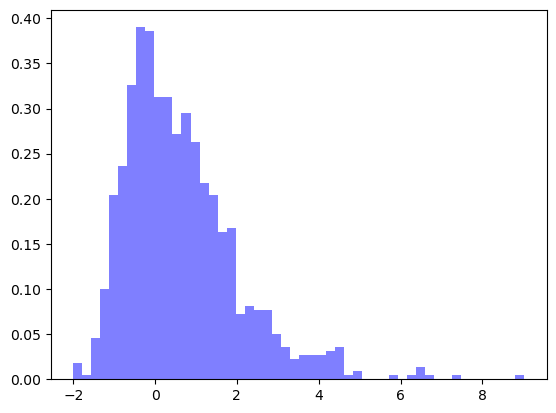

In [40]:
plt.hist(data, bins=50, density=True, alpha=0.5, color="blue")

In [25]:
# Use the TensorFlow Probability package
tfd = tfp.distributions

# Generate some synthetic data (for demonstration purposes, using a GEV distribution)
true_loc = 0.0
true_scale = 1.0
true_concentration = 0.5  # Shape parameter, also known as xi
true_z_star =  true_loc + true_scale / true_concentration 
true_z_star

2.0

In [26]:
def log_prob(z, loc, scale, concentration):
    return -tf.math.log(scale) - (1 + (1 / concentration)) * tf.math.log(1 + concentration * (z - loc) / scale) - tf.math.pow(1 + concentration * (z - loc) / scale, -1 / concentration)


def gev_pdf(z: np.ndarray, alpha: float, beta: float, gamma: float) -> np.ndarray:
    return (
        1
        / beta
        * (1 + gamma * (z - alpha) / beta) ** (-1 / gamma - 1)
        * np.exp(-((1 + gamma * (z - alpha) / beta) ** (-1 / gamma)))
    )

In [33]:
zs = tf.constant(np.linspace(0, 100, num=10))
np.log(gev_pdf(zs, 1, 2, 0.1))
log_prob(zs, 1, 2, 0.1)

InvalidArgumentError: Value for attr 'T' of int32 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
	; NodeDef: {{node Log}}; Op<name=Log; signature=x:T -> y:T; attr=T:type,allowed=[DT_BFLOAT16, DT_HALF, DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_COMPLEX128]> [Op:Log] name: 